# Stroke Prediction Classification Model

##### 1. Derend Marvel Hanson Prionggo - 0706012210030
##### 2. Joren Alexander Toding - 0706012210041
##### 3. Rafi Abhista Naya - 0706012210029

Stroke has become a significant global health problem, being one of the leading causes of death and disability in recent years, with around 101 million people are currently suffering from stroke and living with its consequences and about 6.5 million people die from stroke annually. 85.7% of people who suffer from stroke were also unaware of the symptoms before stroke occurred. This underscores the importance of timely diagnosis for individuals. 

Importing necessary libraries, such as Pandas which handles data manipulation, while NumPy provides mathematical functions for array operations. Matplotlib and Seaborn are used for visualizing data, with Seaborn offering advanced statistical plots. Scikit-learn is used for machine learning tasks, such as splitting data into training and testing sets (train_test_split) and scaling features with RobustScaler to handle outliers. Finally, SMOTE from the imblearn library helps address class imbalances in datasets by generating synthetic samples for underrepresented classes.

In [32]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from imblearn.over_sampling import SMOTE


Importing the dataset (which has been uploaded to GitHub for general/public access), and reading the dataset using Pandas' read_csv() function.

In [33]:
link = 'https://raw.githubusercontent.com/oxqlion/stroke_prediction_dataset/refs/heads/main/healthcare-dataset-stroke-data.csv'
store = pd.read_csv(link)

Displaying the first 5 items of the dataset, getting an overview of the dataset's form, structure, and datatypes.

In [34]:
store.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### 1. Data Preprocessing

As seen above, the second row with the ID 51676 has a null value on the BMI (Body Mass Index) column. Thus, we have to first check for all nulls and handle the null values accordingly.

In [35]:
print(store.isnull().sum())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


We also need to check if there are any duplicate values as they are redundant data and does not contribute positively to the training or the testing of the classification model.

In [36]:
print(store.duplicated().sum)

<bound method Series.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
5105    False
5106    False
5107    False
5108    False
5109    False
Length: 5110, dtype: bool>


A kernel density estimation (KDE) plot is used to visualize the distribution of the bmi column. This helps us understand its spread, identify skewness, and assess whether any preprocessing is needed, such as handling outliers or missing values.

C:\Users\rafia\AppData\Local\Temp\ipykernel_22960\186248652.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(store['bmi'], shade=True)


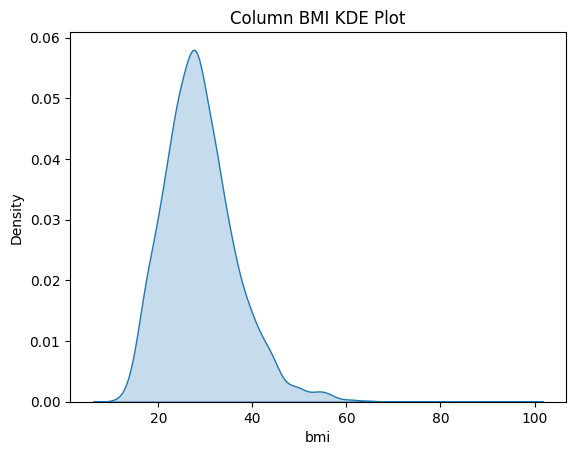

In [37]:
sns.kdeplot(store['bmi'], shade=True)
plt.title('Column BMI KDE Plot')
plt.show()

Missing BMI values are replaced with the median of the column using fillna. The median is chosen as it is robust to outliers and maintains the overall distribution, preventing loss of information while ensuring the dataset remains complete for analysis.

In [38]:
median_bmi = store['bmi'].median()
store['bmi'].fillna(median_bmi, inplace=True)

C:\Users\rafia\AppData\Local\Temp\ipykernel_22960\3164201678.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  store['bmi'].fillna(median_bmi, inplace=True)


Then we run it again to make sure that there is no null

In [39]:
print(store.isnull().sum())

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


The id column is removed because it serves only as a unique identifier and provides no meaningful information for prediction. Dropping irrelevant columns simplifies the dataset and ensures only relevant features are used for analysis and modeling.

In [40]:
store.drop(columns=['id'],inplace = True)

In [41]:
print(store.duplicated().sum)

<bound method Series.sum of 0       False
1       False
2       False
3       False
4       False
        ...  
5105    False
5106    False
5107    False
5108    False
5109    False
Length: 5110, dtype: bool>


Visualizing the numerical columns to check for outliers. Outliers should be removed or handled carefully because they can distort statistical measures like mean and variance, negatively impact the performance of machine learning models, and introduce bias in algorithms that rely on distance calculations. They can also violate assumptions made by many models, such as normality, and affect the scaling of data, leading to inaccurate results. 

Boxplots for Numerical Columns


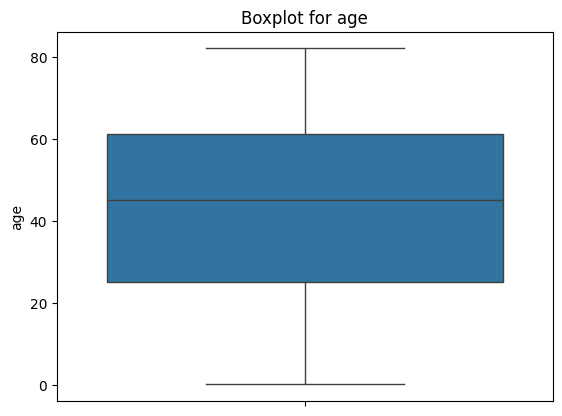

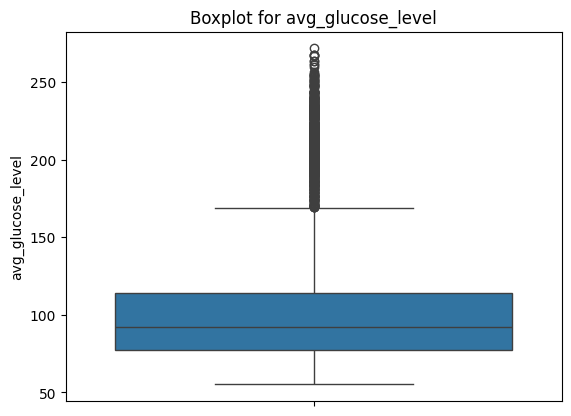

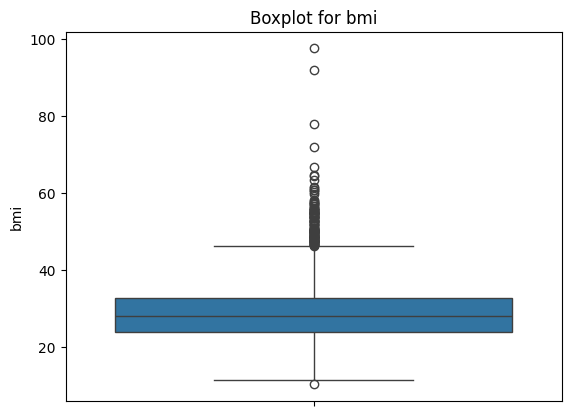

In [42]:
print("Boxplots for Numerical Columns")
numerical_cols = ['age', 'avg_glucose_level', 'bmi']
for col in numerical_cols:
    sns.boxplot(y=store[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

count plots for categorical columns to visualize the frequency distribution of their values, helping identify patterns or imbalances in the dataset.

Count Plots for Categorical Columns


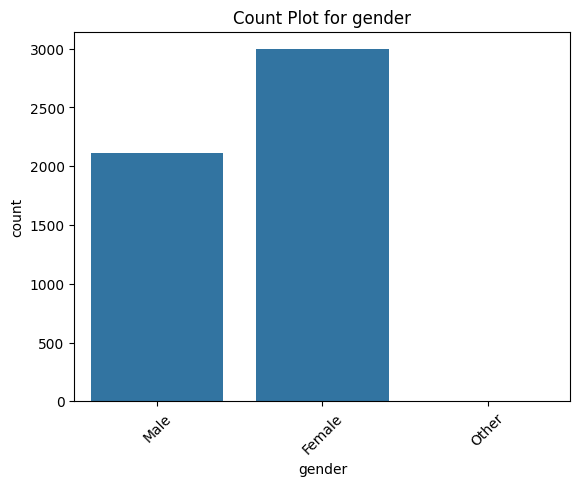

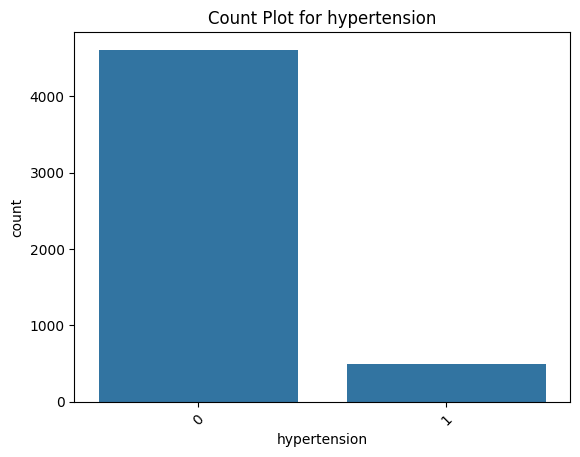

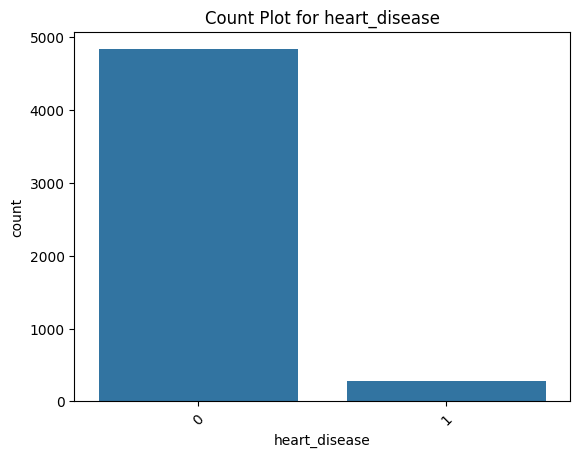

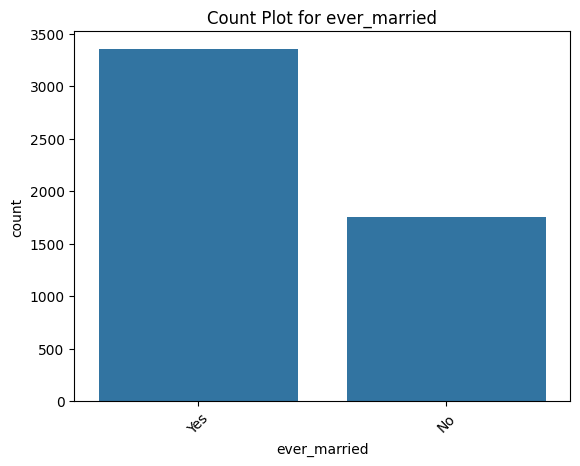

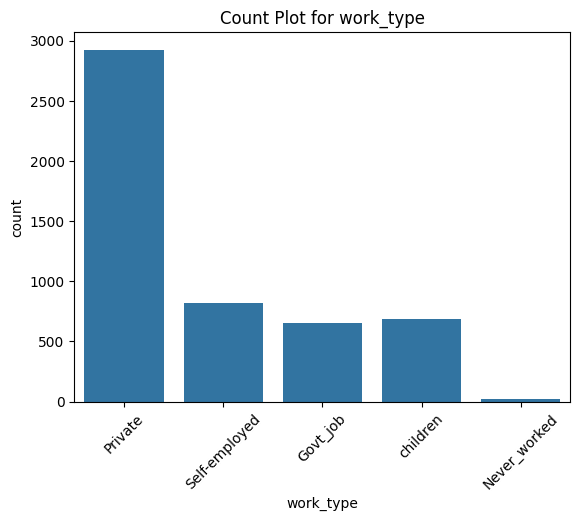

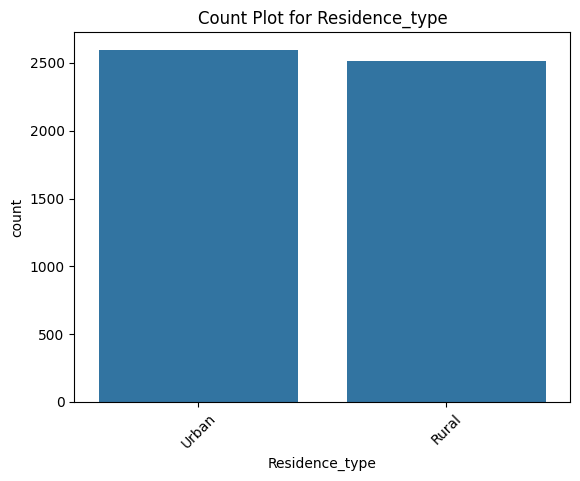

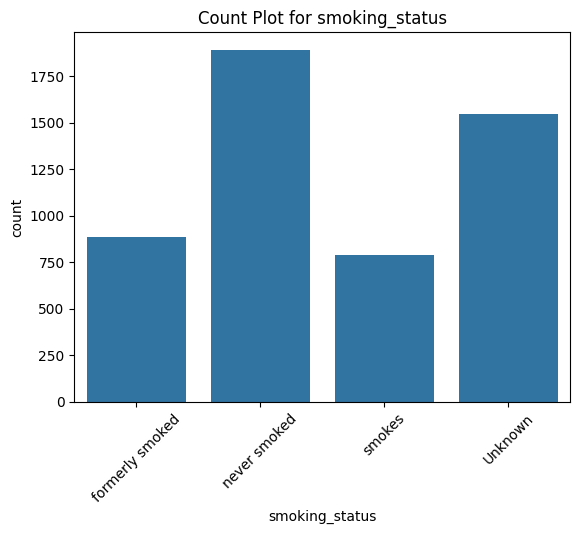

In [43]:
print("Count Plots for Categorical Columns")
categorical_cols = ['gender', 'hypertension', 'heart_disease', 'ever_married', 
                    'work_type', 'Residence_type', 'smoking_status']
for col in categorical_cols:
    sns.countplot(x=col, data=store)
    plt.title(f'Count Plot for {col}')
    plt.xticks(rotation=45)
    plt.show()

 pairplot for numerical features (age, avg_glucose_level, and bmi) with the stroke column as the hue. It visualizes pairwise relationships between these features, helping identify patterns, correlations, or differences in distributions between stroke and non-stroke cases.

Pairplot for Numerical Features


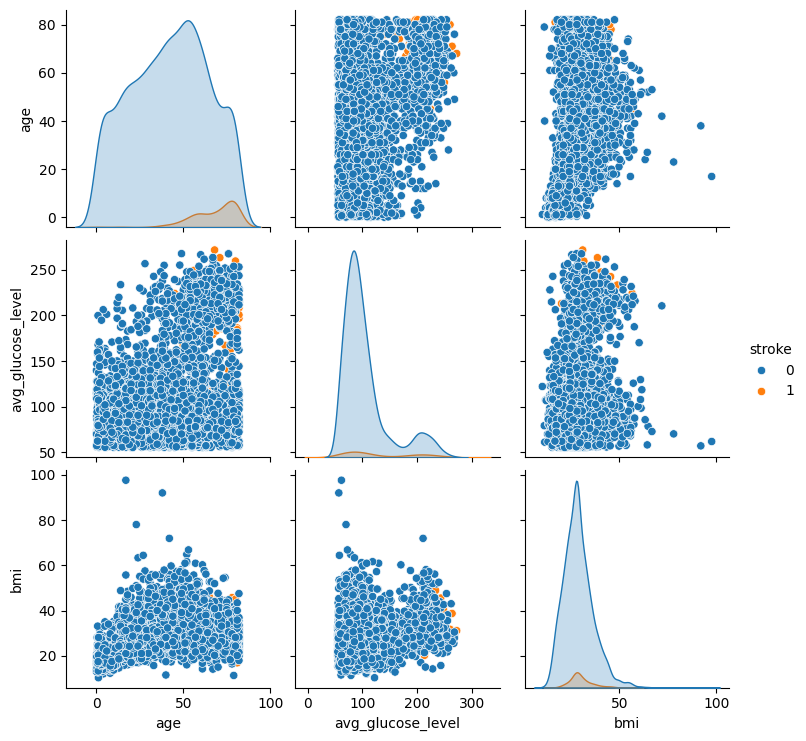

In [44]:
print("Pairplot for Numerical Features")
sns.pairplot(store[['age', 'avg_glucose_level', 'bmi', 'stroke']], hue='stroke')
plt.show()


bar plot to compare stroke counts across genders. The hue='stroke' argument splits the bars by stroke occurrence (stroke vs. no stroke), providing insight into gender-based differences in stroke prevalence.

Bar Plot: Stroke Count by Gender


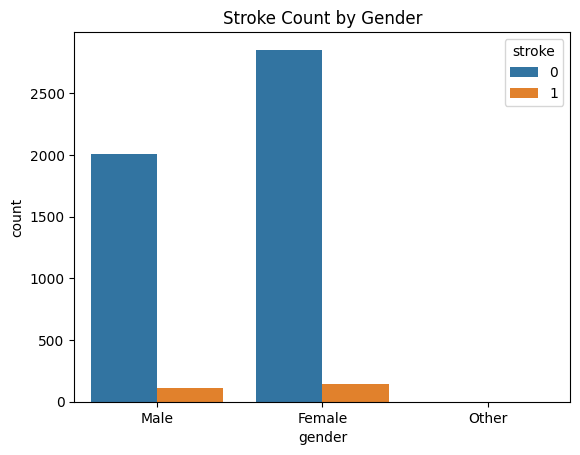

In [45]:
print("Bar Plot: Stroke Count by Gender")
sns.countplot(x='gender', hue='stroke', data=store)
plt.title("Stroke Count by Gender")
plt.show()

scatterplot to visualize the relationship between bmi and avg_glucose_level. The hue='stroke' argument colors the points based on whether a stroke occurred, helping identify any trends or clusters associated with stroke cases.

Scatterplot: BMI vs Avg Glucose Level


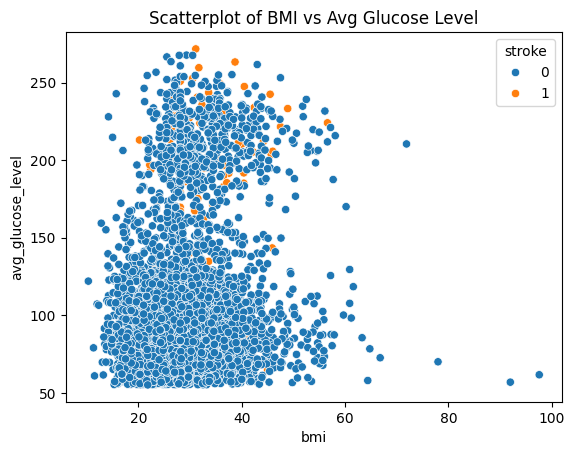

In [46]:
print("Scatterplot: BMI vs Avg Glucose Level")
sns.scatterplot(x='bmi', y='avg_glucose_level', data=store, hue='stroke')
plt.title("Scatterplot of BMI vs Avg Glucose Level")
plt.show()

the distribution of the target variable, stroke, which indicates whether a stroke occurred. The value_counts() method is used to count the number of cases in each class, and the normalized version calculates the percentage of each class. The sns.countplot() visualizes this distribution with a bar plot, showing the imbalance between stroke and non-stroke cases. This helps assess the need for techniques like oversampling to balance the dataset.

stroke
0    4861
1     249
Name: count, dtype: int64


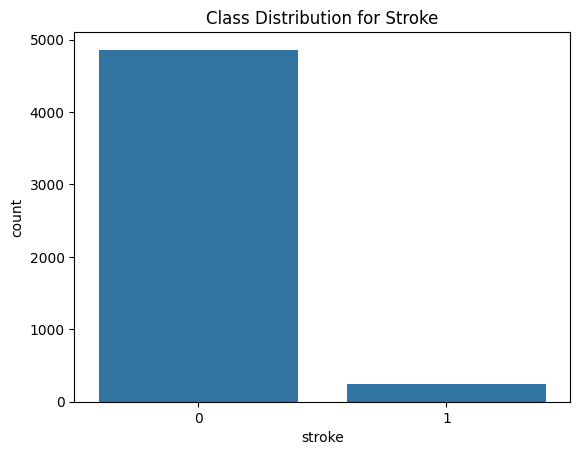

stroke
0    95.127202
1     4.872798
Name: proportion, dtype: float64


In [47]:
# Check the distribution of the target variable
print(store['stroke'].value_counts())

# Visualize the distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=store, x='stroke')
plt.title('Class Distribution for Stroke')
plt.show()

# Optional: Calculate class percentages
print(store['stroke'].value_counts(normalize=True) * 100)


the distribution of categorical columns in the dataset. For each column in categorical_columns, it prints the count and percentage of each category using value_counts() and its normalized version. The counts reveal the frequency of each category, while the percentages provide a relative view of the distribution. The bar plots generated with sns.countplot() visualize these distributions, helping to identify imbalances in the categorical features, such as dominant or underrepresented categories, which can impact model performance. The rotation of x-axis labels ensures readability for long category names.


gender Distribution:
gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64
gender
Female    58.590998
Male      41.389432
Other      0.019569
Name: proportion, dtype: float64


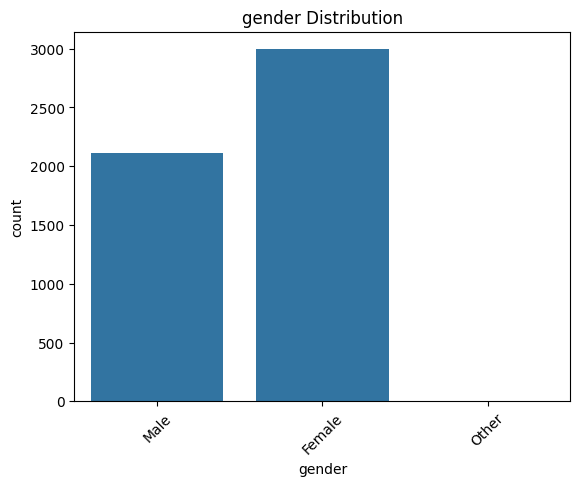


hypertension Distribution:
hypertension
0    4612
1     498
Name: count, dtype: int64
hypertension
0    90.254403
1     9.745597
Name: proportion, dtype: float64


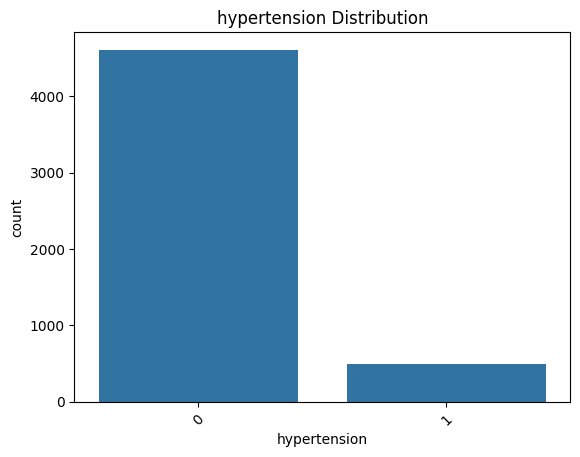


heart_disease Distribution:
heart_disease
0    4834
1     276
Name: count, dtype: int64
heart_disease
0    94.598826
1     5.401174
Name: proportion, dtype: float64


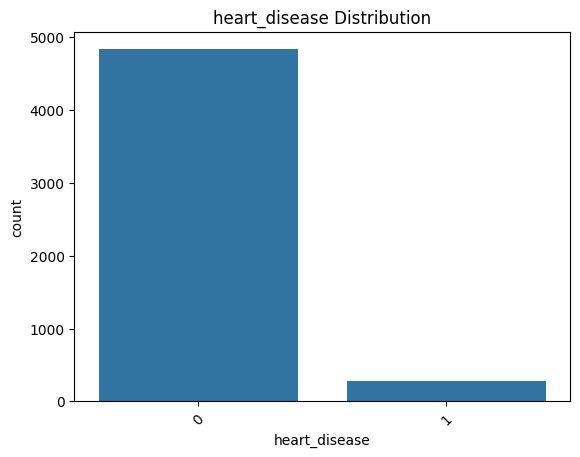


ever_married Distribution:
ever_married
Yes    3353
No     1757
Name: count, dtype: int64
ever_married
Yes    65.616438
No     34.383562
Name: proportion, dtype: float64


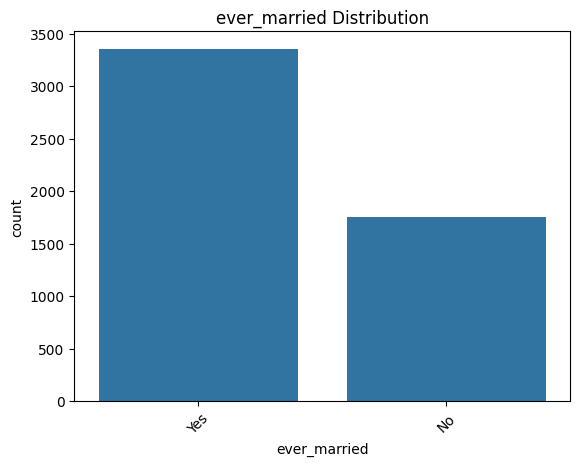


work_type Distribution:
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64
work_type
Private          57.240705
Self-employed    16.027397
children         13.444227
Govt_job         12.857143
Never_worked      0.430528
Name: proportion, dtype: float64


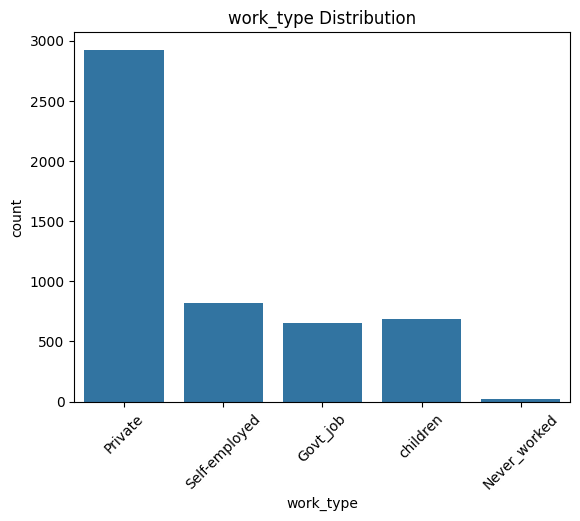


Residence_type Distribution:
Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64
Residence_type
Urban    50.802348
Rural    49.197652
Name: proportion, dtype: float64


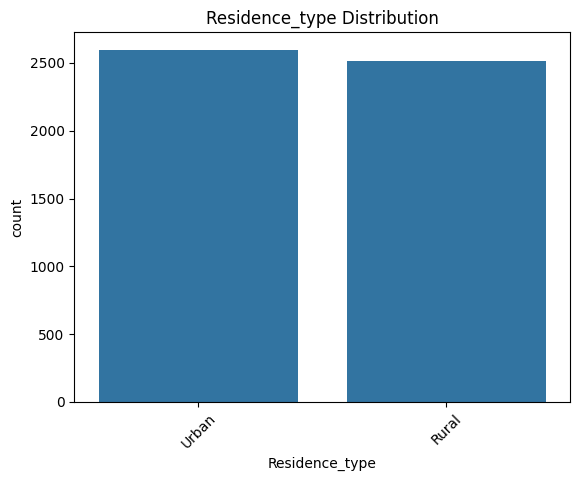


smoking_status Distribution:
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64
smoking_status
never smoked       37.025440
Unknown            30.215264
formerly smoked    17.318982
smokes             15.440313
Name: proportion, dtype: float64


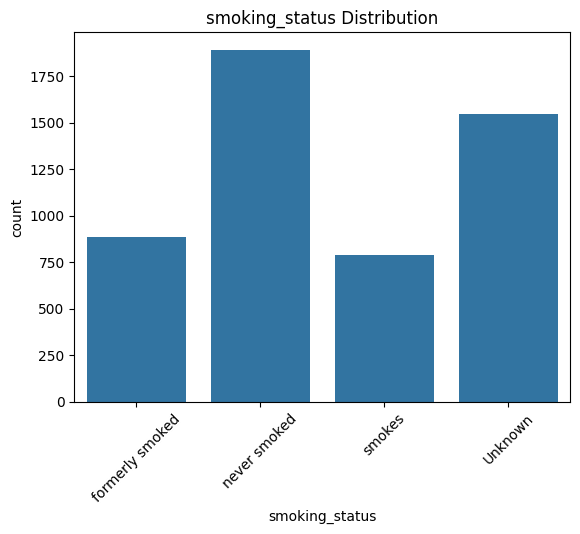

In [48]:
# Check for imbalance in categorical columns
categorical_columns = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

for col in categorical_columns:
    print(f"\n{col} Distribution:")
    print(store[col].value_counts())
    print(store[col].value_counts(normalize=True) * 100)

    # Visualize with a bar plot
    sns.countplot(data=store, x=col)
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=45)
    plt.show()


he distribution of numerical columns in the dataset. It first selects all numerical columns using select_dtypes(), then for each numerical column, it creates a histogram using sns.histplot(). The kde=True argument adds a kernel density estimate (KDE) to the histogram, which smooths the data distribution and helps in identifying patterns like skewness or outliers. The number of bins is set to 30 to control the granularity of the histogram. This visualization helps understand the spread and shape of the numerical data for further analysis or preprocessing.

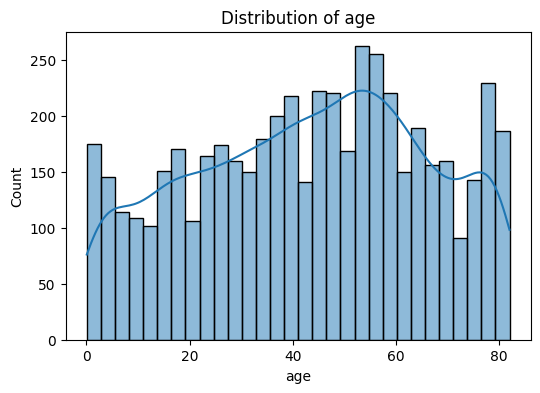

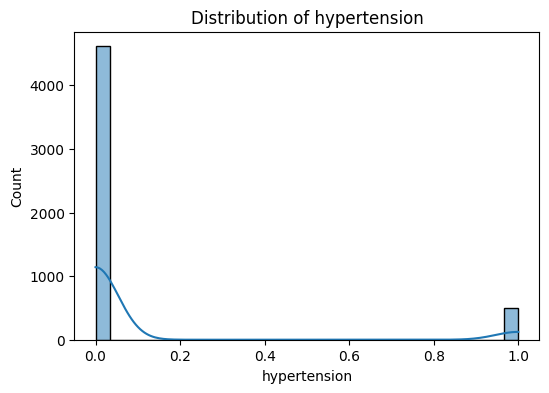

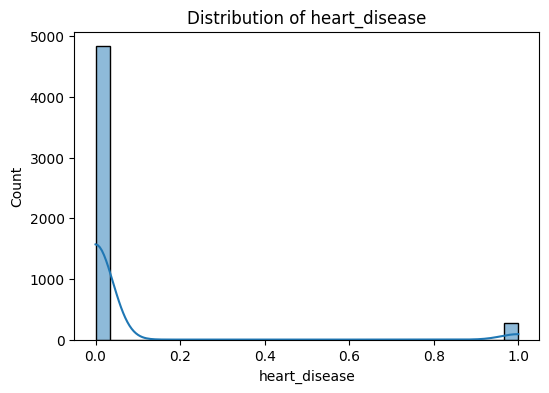

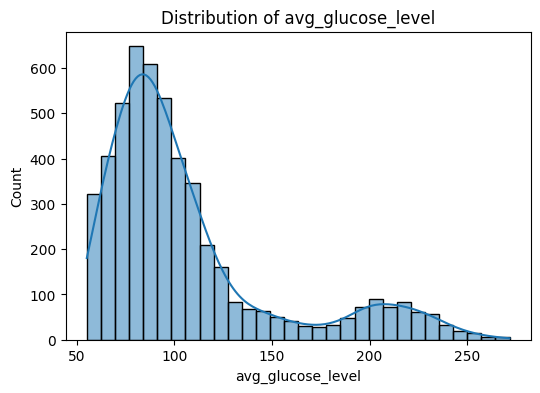

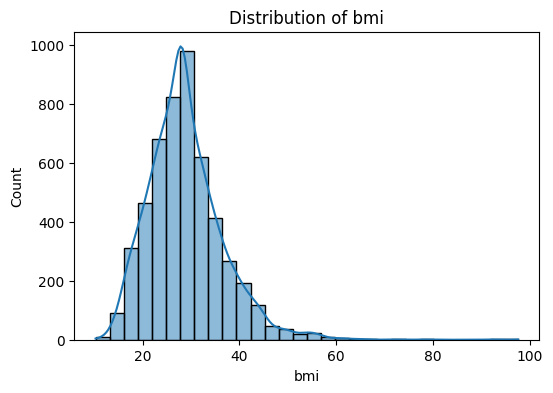

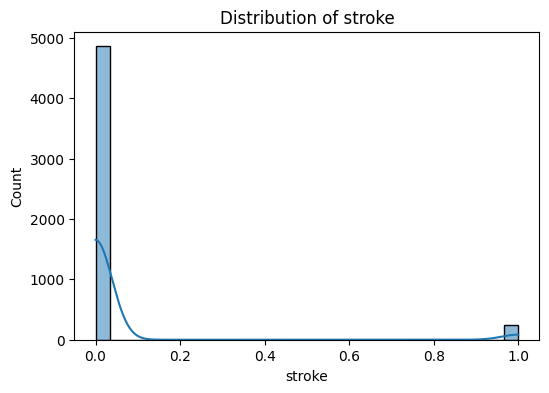

In [49]:
# Visualize distribution of numerical columns
numerical_columns = store.select_dtypes(include=['number']).columns.tolist()

for col in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(store[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

 the skewness of the numerical columns to assess their symmetry. Skewness measures the degree of asymmetry in a distribution: a skewness value greater than 1 or less than -1 indicates a highly skewed distribution. The skew() function is used on the numerical columns to compute this value. The code then identifies and lists the columns with an absolute skewness greater than 1, which are considered highly skewed and may require transformation (e.g., log transformation) to make the data more normal for better model performance.

In [50]:
# Calculate skewness for numerical columns
skewness = store[numerical_columns].skew()
print("Skewness of Numerical Columns:")
print(skewness)

# Identify highly skewed columns
high_skew_columns = skewness[abs(skewness) > 1].index.tolist()
print("\nHighly Skewed Columns:", high_skew_columns)


Skewness of Numerical Columns:
age                 -0.137059
hypertension         2.715392
heart_disease        3.947244
avg_glucose_level    1.572284
bmi                  1.088187
stroke               4.193284
dtype: float64

Highly Skewed Columns: ['hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']


checks the relationship between the stroke target variable and various categorical features. For each categorical column, it calculates the mean stroke rate (store.groupby(col)['stroke'].mean() * 100), which represents the percentage of individuals with a stroke for each category of the feature. This helps in understanding how different categories within each feature are associated with the likelihood of having a stroke. It then visualizes this relationship using a bar plot (sns.barplot), where the x-axis represents the categorical feature and the y-axis represents the stroke rate. This is useful for identifying patterns or trends in stroke occurrence across different groups.


gender vs stroke:
gender
Female    4.709419
Male      5.106383
Other     0.000000
Name: stroke, dtype: float64


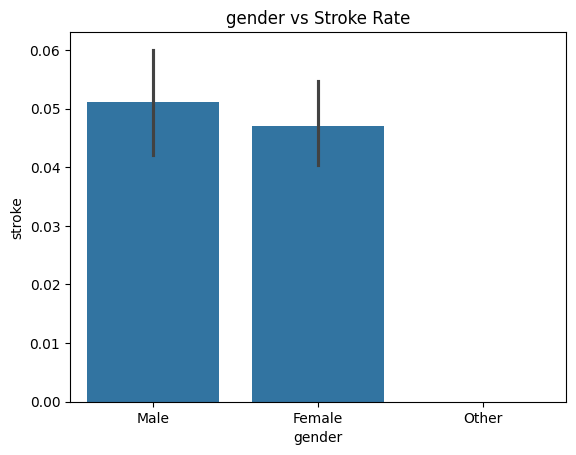


hypertension vs stroke:
hypertension
0     3.967910
1    13.253012
Name: stroke, dtype: float64


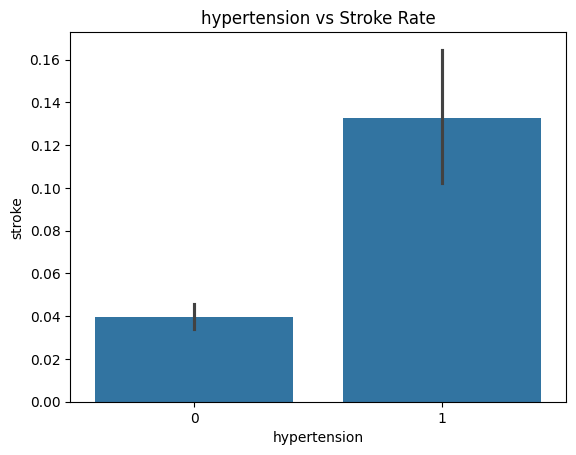


heart_disease vs stroke:
heart_disease
0     4.178734
1    17.028986
Name: stroke, dtype: float64


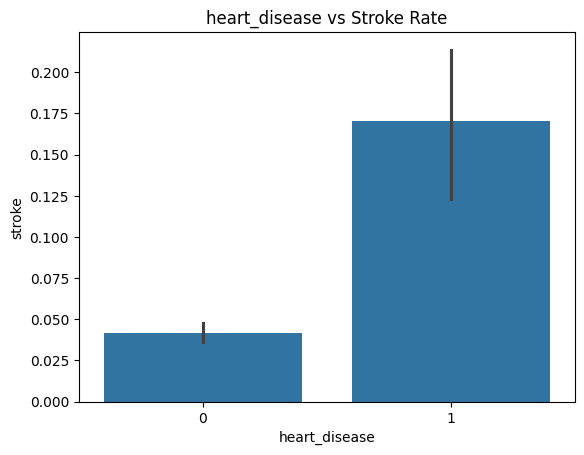


ever_married vs stroke:
ever_married
No     1.650541
Yes    6.561288
Name: stroke, dtype: float64


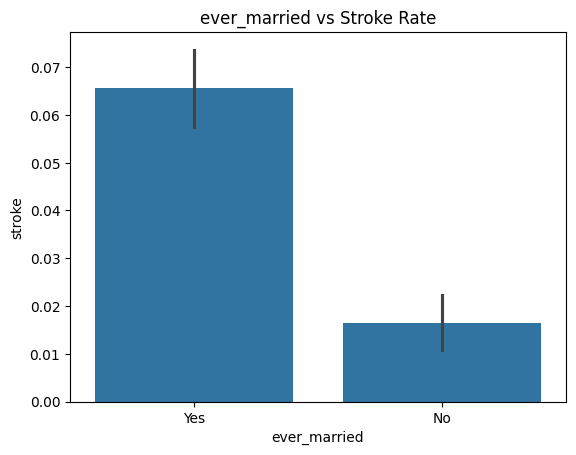


work_type vs stroke:
work_type
Govt_job         5.022831
Never_worked     0.000000
Private          5.094017
Self-employed    7.936508
children         0.291121
Name: stroke, dtype: float64


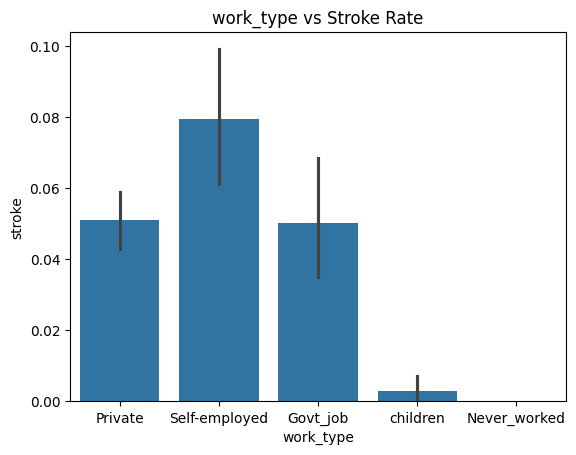


Residence_type vs stroke:
Residence_type
Rural    4.534606
Urban    5.200308
Name: stroke, dtype: float64


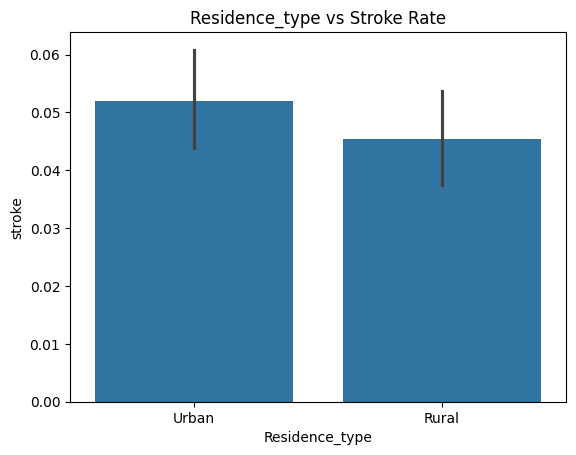


smoking_status vs stroke:
smoking_status
Unknown            3.044041
formerly smoked    7.909605
never smoked       4.756871
smokes             5.323194
Name: stroke, dtype: float64


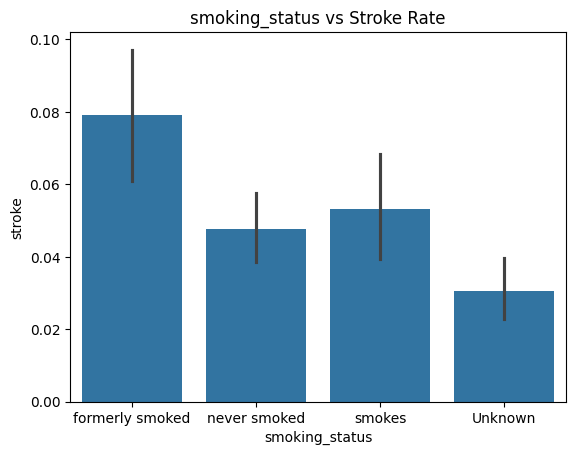

In [51]:
# Check correlation between stroke and other categorical features
for col in categorical_columns:
    print(f"\n{col} vs stroke:")
    print(store.groupby(col)['stroke'].mean() * 100)

    sns.barplot(data=store, x=col, y='stroke')
    plt.title(f'{col} vs Stroke Rate')
    plt.show()

Label encoding converts ordinal categorical variables into numerical values, preserving their inherent order. For example, gender is mapped to integers to make it machine-readable while retaining its logical relationship for analysis and modeling.

One-hot encoding creates binary columns for nominal features, ensuring they are represented numerically without introducing false ordinal relationships. This is necessary for machine learning models to process categorical data accurately.

we will use this for our dataset

In [52]:

#currently im using label encoding for this one because yeah
store['gender'] = store['gender'].map({'Male':0, 'Female':1, 'Other':2})
store['ever_married'] =store['ever_married'].map({'No': 0, 'Yes': 1})
store['Residence_type'] = store['Residence_type'].map({'Urban': 0, 'Rural': 1})

#one-hot encoding
store['Private'] = (store['work_type'] == 'Private').astype(int)
store['Self-employed'] = (store['work_type'] == 'Self-employed').astype(int)
store['Govt_job'] = (store['work_type'] == 'Govt_job').astype(int)
store['Never_worked'] = (store['work_type'] == 'Never_worked').astype(int)
store['children'] = (store['work_type'] == 'children').astype(int)


store['formerly_smoked'] = (store['smoking_status'] == 'formerly smoked').astype(int)
store['never_smoked'] = (store['smoking_status'] == 'never smoked').astype(int)
store['has_smokes'] = (store['smoking_status'] == 'smokes').astype(int)
store['smoke_Unknown'] = (store['smoking_status'] == 'Unknown').astype(int)

store.drop(columns=['smoking_status','work_type'],inplace = True)



In [53]:
store.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,Private,Self-employed,Govt_job,Never_worked,children,formerly_smoked,never_smoked,has_smokes,smoke_Unknown
0,0,67.0,0,1,1,0,228.69,36.6,1,1,0,0,0,0,1,0,0,0
1,1,61.0,0,0,1,1,202.21,28.1,1,0,1,0,0,0,0,1,0,0
2,0,80.0,0,1,1,1,105.92,32.5,1,1,0,0,0,0,0,1,0,0
3,1,49.0,0,0,1,0,171.23,34.4,1,1,0,0,0,0,0,0,1,0
4,1,79.0,1,0,1,1,174.12,24.0,1,0,1,0,0,0,0,1,0,0


Correlation Heatmap


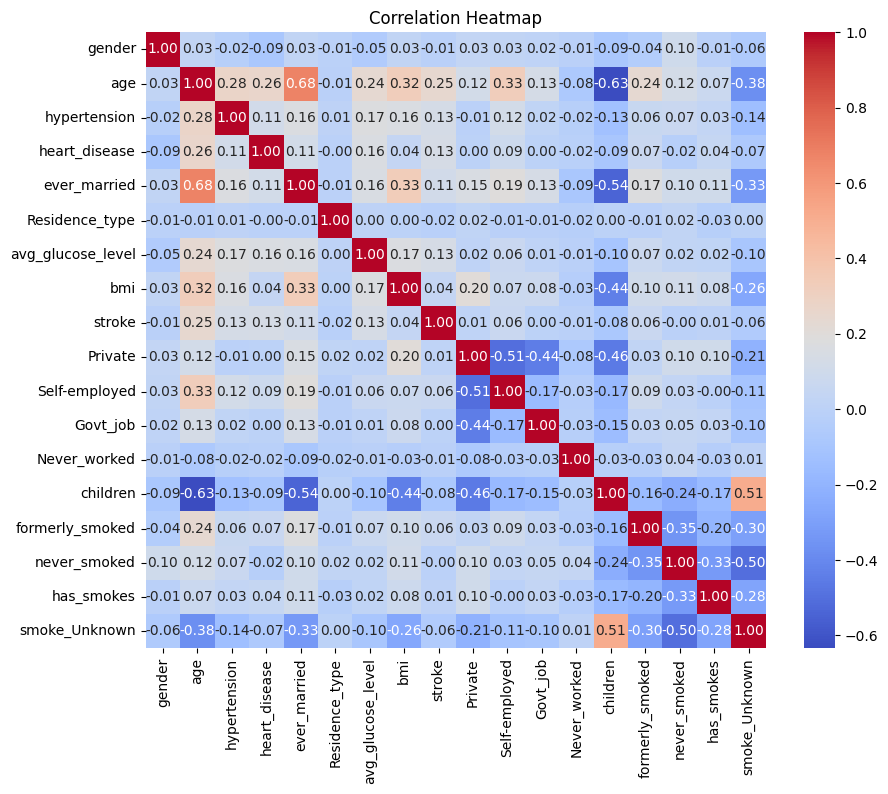

In [54]:
print("Correlation Heatmap")
plt.figure(figsize=(10, 8))
sns.heatmap(store.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Outliers are identified using the IQR method, which defines acceptable data ranges based on quartiles. Removing outliers ensures the dataset is free from extreme values that could distort results or negatively affect model performance.

In [55]:
# Define numerical_columns dynamically or manually
numerical_columns = store.select_dtypes(include=['number']).columns.tolist()

# Store avg_glucose_level and bmi separately
avg_glucose = store['avg_glucose_level']
bmi = store['bmi']

# Drop avg_glucose_level and bmi from the DataFrame
store = store.drop(columns=['avg_glucose_level', 'bmi'])

# Ensure avg_glucose_level and bmi are not part of numerical_columns
numerical_columns = [col for col in numerical_columns if col not in ['avg_glucose_level', 'bmi']]

# Initialize empty DataFrames to store outlier rows
outliers = pd.DataFrame()

# Detect and remove outliers for each numerical attribute in train set
for column in numerical_columns:
    Q1 = store[column].quantile(0.25)
    Q3 = store[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)

    # Identify outliers
    column_outliers = store[(store[column] < lower_bound) | (store[column] > upper_bound)]
    outliers = pd.concat([outliers, column_outliers])

# Drop duplicate outliers, if any, across multiple columns
outliers = outliers.drop_duplicates()
train = store.drop(outliers.index)

# Re-attach avg_glucose_level and bmi columns back to the train set
store.insert(6, 'avg_glucose_level', avg_glucose)
store.insert(7, 'bmi', bmi)

# Display the rows identified as outliers
print("\nOutlier rows:")
outliers.head()


Outlier rows:


,gender,age,hypertension,heart_disease,ever_married,Residence_type,stroke,Private,Self-employed,Govt_job,Never_worked,children,formerly_smoked,never_smoked,has_smokes,smoke_Unknown
4,1,79.0,1,0,1,1,1,0,1,0,0,0,0,1,0,0
6,0,74.0,1,1,1,1,1,1,0,0,0,0,0,1,0,0
10,1,81.0,1,0,1,1,1,1,0,0,0,0,0,1,0,0
15,1,50.0,1,0,1,1,1,0,1,0,0,0,0,1,0,0
17,0,75.0,1,0,1,0,1,1,0,0,0,0,0,0,1,0


In [56]:
store.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,Private,Self-employed,Govt_job,Never_worked,children,formerly_smoked,never_smoked,has_smokes,smoke_Unknown
0,0,67.0,0,1,1,0,228.69,36.6,1,1,0,0,0,0,1,0,0,0
1,1,61.0,0,0,1,1,202.21,28.1,1,0,1,0,0,0,0,1,0,0
2,0,80.0,0,1,1,1,105.92,32.5,1,1,0,0,0,0,0,1,0,0
3,1,49.0,0,0,1,0,171.23,34.4,1,1,0,0,0,0,0,0,1,0
4,1,79.0,1,0,1,1,174.12,24.0,1,0,1,0,0,0,0,1,0,0


In [57]:
print(store.isnull().sum())

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
Residence_type       0
avg_glucose_level    0
bmi                  0
stroke               0
Private              0
Self-employed        0
Govt_job             0
Never_worked         0
children             0
formerly_smoked      0
never_smoked         0
has_smokes           0
smoke_Unknown        0
dtype: int64


In this section, the dataset is prepared for training by first defining the features (X) and the target variable (y). The target variable, stroke, is isolated from the dataset, as it represents the outcome we want to predict, while all other columns are treated as input features. Next, SMOTE (Synthetic Minority Oversampling Technique) is applied to address the class imbalance issue in the stroke column, which is crucial because an imbalanced dataset can bias the model toward the majority class, leading to poor prediction performance on the minority class (stroke = 1). SMOTE generates synthetic samples for the minority class, creating a more balanced dataset and improving the model's ability to generalize. After balancing the dataset, it is split into training and testing sets using train_test_split. The training set (X_train and y_train) is used to train the model, while the testing set (X_test and y_test) evaluates its performance on unseen data. The test_size=0.2 ensures that 20% of the data is allocated for testing, and random_state=42 guarantees reproducibility of the splitting process, ensuring consistent results across multiple runs.

In [58]:
# Define features and target
X = store.drop(columns=['stroke'])
y = store['stroke']

# Apply SMOTE for oversampling the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train,X_test,y_train,y_test =  train_test_split(X_resampled,y_resampled, test_size=0.2,random_state=42)

In [59]:
print(y_resampled.value_counts())

stroke
1    4861
0    4861
Name: count, dtype: int64


Numerical features are scaled using the RobustScaler, which normalizes data based on the median and IQR. This method minimizes the impact of outliers while ensuring consistency across features, making it easier for models to learn effectively.

In [60]:
store[numerical_cols] = RobustScaler().fit_transform(store[numerical_cols])

In [61]:
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

# Step 5: Define Model Configurations
configs = {
    "Support Vector Machine": {
        "model": SVC(probability=True, random_state=42),
        "params": {
            "C": [0.1, 1],
            "kernel": ["linear", "rbf"],
            "gamma": ["scale"]
        }
    },
    "Logistic Regression": {
        "model": LogisticRegression(random_state=42, max_iter=1000),
        "params": {
            "C": [0.1, 1],
            "solver": ["liblinear"]
        }
    },
    "Gradient Boosting": {
        "model": GradientBoostingClassifier(random_state=42),
        "params": {
            "n_estimators": [50],
            "learning_rate": [0.01, 0.1],
            "max_depth": [3]
        }
    }
}

In [62]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score

# Step 6: Train and Evaluate Models
results = {}

for name, config in configs.items():
    print(f"Training and Tuning {name}...")
    
    # Hyperparameter Tuning with RandomizedSearchCV (faster than GridSearchCV)
    randomized_search = RandomizedSearchCV(config["model"], config["params"], cv=3, scoring='accuracy', n_jobs=-1, n_iter=4, random_state=42)
    randomized_search.fit(X_train, y_train)
    
    # Get Best Model
    best_model = randomized_search.best_estimator_
    print(f"Best Parameters for {name}: {randomized_search.best_params_}")
    
    # Predictions
    y_pred = best_model.predict(X_test)
    y_proba = best_model.predict_proba(X_test)[:, 1] if hasattr(best_model, "predict_proba") else None

    # Metrics
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba) if y_proba is not None else "N/A"
    report = classification_report(y_test, y_pred)

    # Save Results
    results[name] = {"Accuracy": acc, "AUC": auc, "Classification Report": report}
    
    # Display Results
    print(f"Model: {name}")
    print(f"Accuracy: {acc:.2f}")
    print(f"AUC: {auc if auc != 'N/A' else 'Not Applicable'}")
    print("Classification Report:")
    print(report)
    print("-" * 60)

Training and Tuning Support Vector Machine...
Best Parameters for Support Vector Machine: {'kernel': 'linear', 'gamma': 'scale', 'C': 1}
Model: Support Vector Machine
Accuracy: 0.94
AUC: 0.9752270684641817
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       975
           1       0.97      0.90      0.93       970

    accuracy                           0.94      1945
   macro avg       0.94      0.94      0.94      1945
weighted avg       0.94      0.94      0.94      1945

------------------------------------------------------------
Training and Tuning Logistic Regression...


c:\Users\rafia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 2 is smaller than n_iter=4. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameters for Logistic Regression: {'solver': 'liblinear', 'C': 1}
Model: Logistic Regression
Accuracy: 0.93
AUC: 0.9767285223367699
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.96      0.93       975
           1       0.95      0.90      0.92       970

    accuracy                           0.93      1945
   macro avg       0.93      0.93      0.93      1945
weighted avg       0.93      0.93      0.93      1945

------------------------------------------------------------
Training and Tuning Gradient Boosting...


c:\Users\rafia\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 2 is smaller than n_iter=4. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameters for Gradient Boosting: {'n_estimators': 50, 'max_depth': 3, 'learning_rate': 0.1}
Model: Gradient Boosting
Accuracy: 0.93
AUC: 0.9810674068199841
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       975
           1       0.94      0.93      0.93       970

    accuracy                           0.93      1945
   macro avg       0.93      0.93      0.93      1945
weighted avg       0.93      0.93      0.93      1945

------------------------------------------------------------


Overfitting Test
Overfitting occurs when the model performs well on the training data but poorly on the test data. To detect overfitting:

Evaluate the model on both the training and testing datasets.
Compare metrics like accuracy. If training accuracy is much higher than testing accuracy, overfitting might be happening.


In [63]:
from sklearn.metrics import mean_squared_error

# Predictions
train_preds = best_model.predict(X_train)
test_preds = best_model.predict(X_test)

# Calculate errors
train_error = mean_squared_error(y_train, train_preds)
test_error = mean_squared_error(y_test, test_preds)

print(f"Training Error: {train_error}")
print(f"Testing Error: {test_error}")

if train_error < test_error and (test_error - train_error) > 0.1:
    print("Model may be overfitting.")
elif train_error > 0.1 and test_error > 0.1:
    print("Model may be underfitting.")
else:
    print("Model seems to have a good fit.")

Training Error: 0.06596373923106597
Testing Error: 0.067866323907455
Model seems to have a good fit.


Once the model is ready and performs well, save it for later use:

Use joblib or pickle to export the trained model.

In [64]:
import joblib

# Save the trained model to a file
model_filename = "classification_model.pkl"
joblib.dump(best_model, model_filename)

print(f"Model saved as {model_filename}")


Model saved as classification_model.pkl
